## 神经网络和反向传播算法
机器学习中的神经网络是指“神经网络学习”，或者说，是机器学习与神经网络这两个学科领域的交叉部分，  
神经网络中最基本的成分是神经元(neuron)模型。在生物神经网络中，每个神经元与其他神经元相连，当它"兴奋"时，就会向相连的神经元发送化学物质，从而改变这些神经元内的电位；如果某神经元的电位超过了一个"阈值"，那么它就会被激活，即"兴奋"起来，向其他神经元发送化学物质。  
- 简单的“M—P 神经元模型”(如下图)
在这个模型中，神经元接收到来自n个其他神经元传递过来的输入信号，这些信号通过带权重的连接进行传递，神经元接收到的总输入值将与神经元的阈值进行比较，然后通过"激活函数"处理产生神经元的输出。

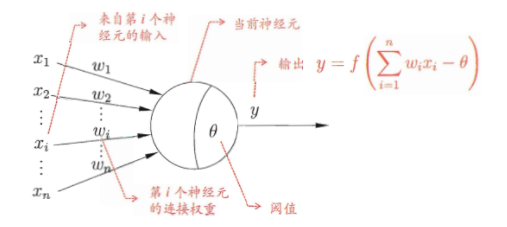

In [1]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/5.png")

## 1.预备知识
### 1.1常见的几种激活函数（具体用到再补充）
- 阶跃函数，它将输入值映射为输出值0或1，1对应神经元兴奋，0对应抑制。但它具有不连续、不光滑等不好的性质，实际中常用sigmoid函数。  
- sigmoid函数，也称logistic函数，将可能在较大范围内变化的输入值挤压到(0,1)输出范围内，因此有时也称挤压函数(squashing function),$f(x)=\dfrac{1}{1+e^{-x}}$
- tanh: $f(x)=\tanh(x)$
- softmax: $f(x)= log(1+\exp{x})$
- ReLu: $f(x)=\max(0,x)$

### 1.2为什么要使用激活函数
激活函数，并不是去激活什么，而是指如何把“激活的神经元的特征”通过函数把特征保留并映射出来（保留特征，去除一些数据中是的冗余），这是神经网络能解决非线性问题关键。
- 如果不用激活函数，相当于激活函数$f(x)=x$，每一层输出都是上层输入的线性函数,与只有一个隐藏层效果相当，这种情况就是多层感知机了(MLP).  
  如果使用的话，激活函数给神经元引入了非线性因素，使得神经网络可以任意逼近任何非线性函数，这样神经网络就可以应用到众多的非线性模型中。
- 构建稀疏矩阵，也就是稀疏性，这个特性可以去除数据中的冗余，最大可能保留数据的特征，也就是大多数为0的稀疏矩阵来表示。  
  其实这个特性主要是对于Relu，它就是取的max(0,x)，因为神经网络是不断反复计算，实际上变成了它在尝试不断试探如何用一个大多数为0的矩阵来尝试表达数据特征，结果因为稀疏特性的存在，反而这种方法变得运算得又快效果又好了。
### 1.3 注意：
用sigmoid和tanh作为激活函数的话，一定要注意对输入进行归一化／标准化，否则激活后的值都会进入平坦去，使隐层的输出全部趋同，但是 ReLU 并不需要输入归一化来防止它们达到饱和。


$\delta w_i=\eta(y-\hat{y})x_i$

## 2.误差逆传播算法(BP- error Back Propagation)
多层网络的学习能力显然比单层感知机强得多。误差逆传播算法，也叫反向传播算法,是迄今最成功的神经网络学习算法。"BP网络"一般指用BP算法训练的多层前馈神经网络。   
### 2.1 基本描述
给定训练集$D={\{(x_1,y_1),(x_2,y_2),\cdots,(x_m,y_m)}\},x_i\in R^d,y_i\in R^l$,即输入实例由d个属性描述，输出$l$维实值向量。  
如下图，给出了一个拥有d个神经元，$l$个输出神经元，q个隐层神经元的多层前馈网络结构。  
- 输出层第j个神经元的阈值用$\theta_j$表示，隐层第h个神经元的阈值用$\gamma_h$表示；   
- 输入层第i个神经元与隐层第h个神经元之间的连接权重为$v_{ih}$；    
- 隐层第h个神经元与输出层第j个神经元之间的连接权为$w_{hj}$；    
- 记隐层第h个神经元接收到的输入值为：$\alpha_h=\sum_{i=1}^dv_{ih}x_i$；  
- 输出层第j个神经元接收到的输入为$\beta_j=\sum_{h=1}^qw_{hj}b_h$,其中$b_h$为隐层第h个神经元的输出。假设隐层和输出层都使用sigmoid函数作为激活函数。  
>  注意：不同的激活函数推导过程不同，但思想相同

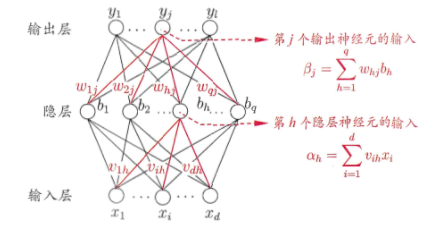

In [1]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/6.png")

> - 图示神经网络中共有$(d+l+1)\times q+l$个参数需要确定 
>- 输入层到隐层有$d\times q$个权值   
q个隐层神经元的阈值  
隐层到输出层有$q\times l$个权值  
$l$个输出层神经元的阈值  


对于训练样例$(x_k,y_k)$,假定神经网络的输出为$\hat{y}_k=(\hat{y}_1^k,\hat{y}_2^k,.\cdots,\hat{y}_l^k)$,即：  
$$\hat{y}_j^k=f(\beta_j-\theta_j)$$  
则网络在$(x_k,y_k)$上的均方误差为：
$$E_k=\dfrac{1}{2}\sum_{j=1}^l({y}_j^k-\hat{y}_j^k)^2$$  

### 2.2 核心思想
BP是一个迭代学习算法，在迭代的每一轮我们采用广义的感知机学习规则，也就是Delta规则(LMS算法)。  
BP算法基于梯度下降策略，以目标的负梯度方向对参数进行调整，对上式的误差$E_k$,给定学习率$\eta$,有：  
$$\Delta w_{hj}=\eta\dfrac{\partial E_k}{\partial w_{hj}}$$  
> - 推导过程：  
\begin{eqnarray}
\dfrac{\partial E_k}{\partial w_{hj}}=
\end{eqnarray}